In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
agoop = pd.read_csv('filtered_staging_2 - filtered_staging_2.csv')
agoop.head()

,datetime,dailyid,dayofweek,os,home_countryname,plmn,plmn_countryname,setting_currency,setting_language,setting_country,...,gender,longitude,latitude,previous_datetime,previous_interval_s,next_interval_s,distance_m,speed_calc_kmh,mesh1kmid,state
0,2018/10/02 3:22:00,f14573a3b7ceff373c7c20a458bbedfc81b9d529a7321c...,2,Android,Japan,44010.0,Japan,NaN,ja,NaN,...,na,133.960797,34.253109,2018/10/02 3:17:00,300.0,-120,24.832073,0.297985,51333706,Stay
1,2018/10/02 3:46:00,f14573a3b7ceff373c7c20a458bbedfc81b9d529a7321c...,2,Android,Japan,44010.0,Japan,NaN,ja,NaN,...,na,133.982037,34.264284,2018/10/02 3:41:00,300.0,-180,295.202922,3.542435,51333718,Stay
2,2018/10/02 3:36:00,f14573a3b7ceff373c7c20a458bbedfc81b9d529a7321c...,2,Android,Japan,44010.0,Japan,NaN,ja,NaN,...,na,133.979323,34.263039,2018/10/02 3:31:00,300.0,-300,735.214425,8.822573,51333718,Move
3,2018/10/02 3:31:00,f14573a3b7ceff373c7c20a458bbedfc81b9d529a7321c...,2,Android,Japan,44010.0,Japan,NaN,ja,NaN,...,na,133.972134,34.260138,2018/10/02 3:24:00,420.0,-300,1314.661524,11.268527,51333717,Move
4,2018/10/02 3:49:00,f14573a3b7ceff373c7c20a458bbedfc81b9d529a7321c...,2,Android,Japan,44010.0,Japan,NaN,ja,NaN,...,na,133.978555,34.264184,2018/10/02 3:46:00,180.0,-180,320.179127,6.403583,51333718,Move


使うカラム一覧（随時追加）
datetime
longitude
latitude
...

In [17]:
df = agoop[['dailyid', 'datetime', 'longitude', 'latitude']]

In [18]:
df['dailyid'].value_counts()


dailyid
f5d7e0fa3eeda91958829dde824dcabfc67f335e167cdc711e93cb4d1bb05ae281f294532ed0152d11ac5748cfe3d2c5    14
f14573a3b7ceff373c7c20a458bbedfc81b9d529a7321c89f378690d68e3aeed502caba6c29da90d19c71af82dbc6fa0    13
ffbb96f8550d489aaf041ee256e78125cc930a213719e7cf8e47a9c0612e29aaa521e52a1ee1a40674acb8c6fe56fb98    13
efd20b2d427910bce4bec72645788a16b09420d297f3e3d5cc2cfeda83c54f47bf6cccf764b1140f482b00db416e21fa    13
f3b619e554efe8fff911d87fef2082748745beb5263f4245d183c69dbd1d151c8c66c712a10348a99b3489622d002658    13
                                                                                                    ..
f77268930e0aca9abca1114c489163163096513e210016125d742f47023e21b3fe9bbd601c7c3cfee311c1060c650ecf     1
f8c0d8c857c47e5c70eceff87bdad9284822c9856c185e57ba0f2bdd2512352ecfe2e92ddf5fa8427ff80ff998449c7f     1
f8e4bfa47d61f070b5137d01c3dfa0eacd8eb8d8dce89e869088023a3caecfc89068d8bd6e2a3a302648cd4761db9f4b     1
fcb04ac9665ddd57fc8d142bd16a0c8cd99d6006621e1f698356e742fcf125d06

In [19]:
# dailyidごとにグループ化し、datetimeでソート
df_sorted = df.sort_values(by=['dailyid', 'datetime'])

# ソートされたデータフレームを表示
df_sorted.head()

,dailyid,datetime,longitude,latitude
75,ef1fd4baa1cfd202573184354108dfe4a821452f5a20fc...,2018/10/02 3:04:00,134.081246,34.325119
74,ef1fd4baa1cfd202573184354108dfe4a821452f5a20fc...,2018/10/02 3:14:00,134.081415,34.325128
76,ef1fd4baa1cfd202573184354108dfe4a821452f5a20fc...,2018/10/02 3:24:00,134.081411,34.325126
72,ef1fd4baa1cfd202573184354108dfe4a821452f5a20fc...,2018/10/02 3:29:00,134.081409,34.325126
70,ef1fd4baa1cfd202573184354108dfe4a821452f5a20fc...,2018/10/02 3:39:00,134.081409,34.325126


In [20]:
df_rep = df.sort_values(by='datetime').groupby('dailyid', as_index=False).first()
df_rep.head()


,dailyid,datetime,longitude,latitude
0,ef1fd4baa1cfd202573184354108dfe4a821452f5a20fc...,2018/10/02 3:04:00,134.081246,34.325119
1,ef4de5f3a9b0bb463e62b09ef02fd8b821ab4c0527f513...,2018/10/02 3:30:00,134.049457,34.297491
2,efd20b2d427910bce4bec72645788a16b09420d297f3e3...,2018/10/02 3:00:00,134.064949,34.329992
3,eff055c2ddff6fc3eac44e074e918e774764e7704cb248...,2018/10/02 3:05:00,134.078705,34.306201
4,f0045ab4b8b15f0a3899d1671121276c926a7288300937...,2018/10/02 3:06:00,134.065700,34.345850


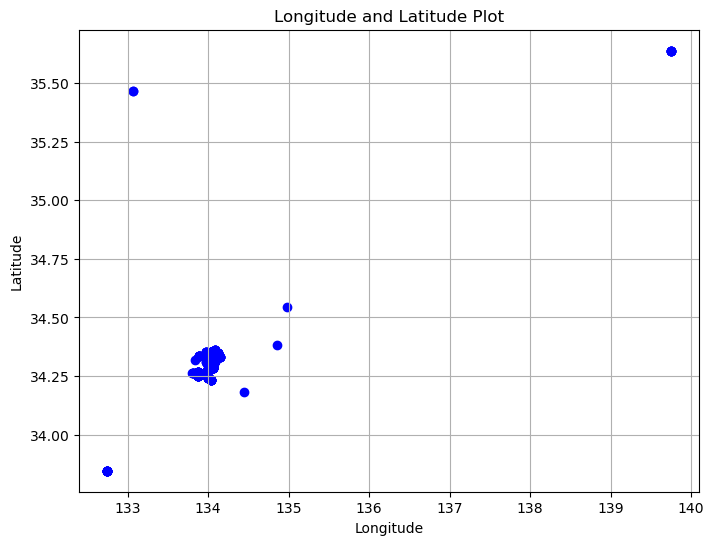

In [21]:
# プロット
plt.figure(figsize=(8, 6))
plt.scatter(df['longitude'], df['latitude'], c='blue', marker='o')

# グラフのタイトルとラベル
plt.title('Longitude and Latitude Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# グリッドを表示
plt.grid(True)

# プロットを表示
plt.show()